In [ ]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

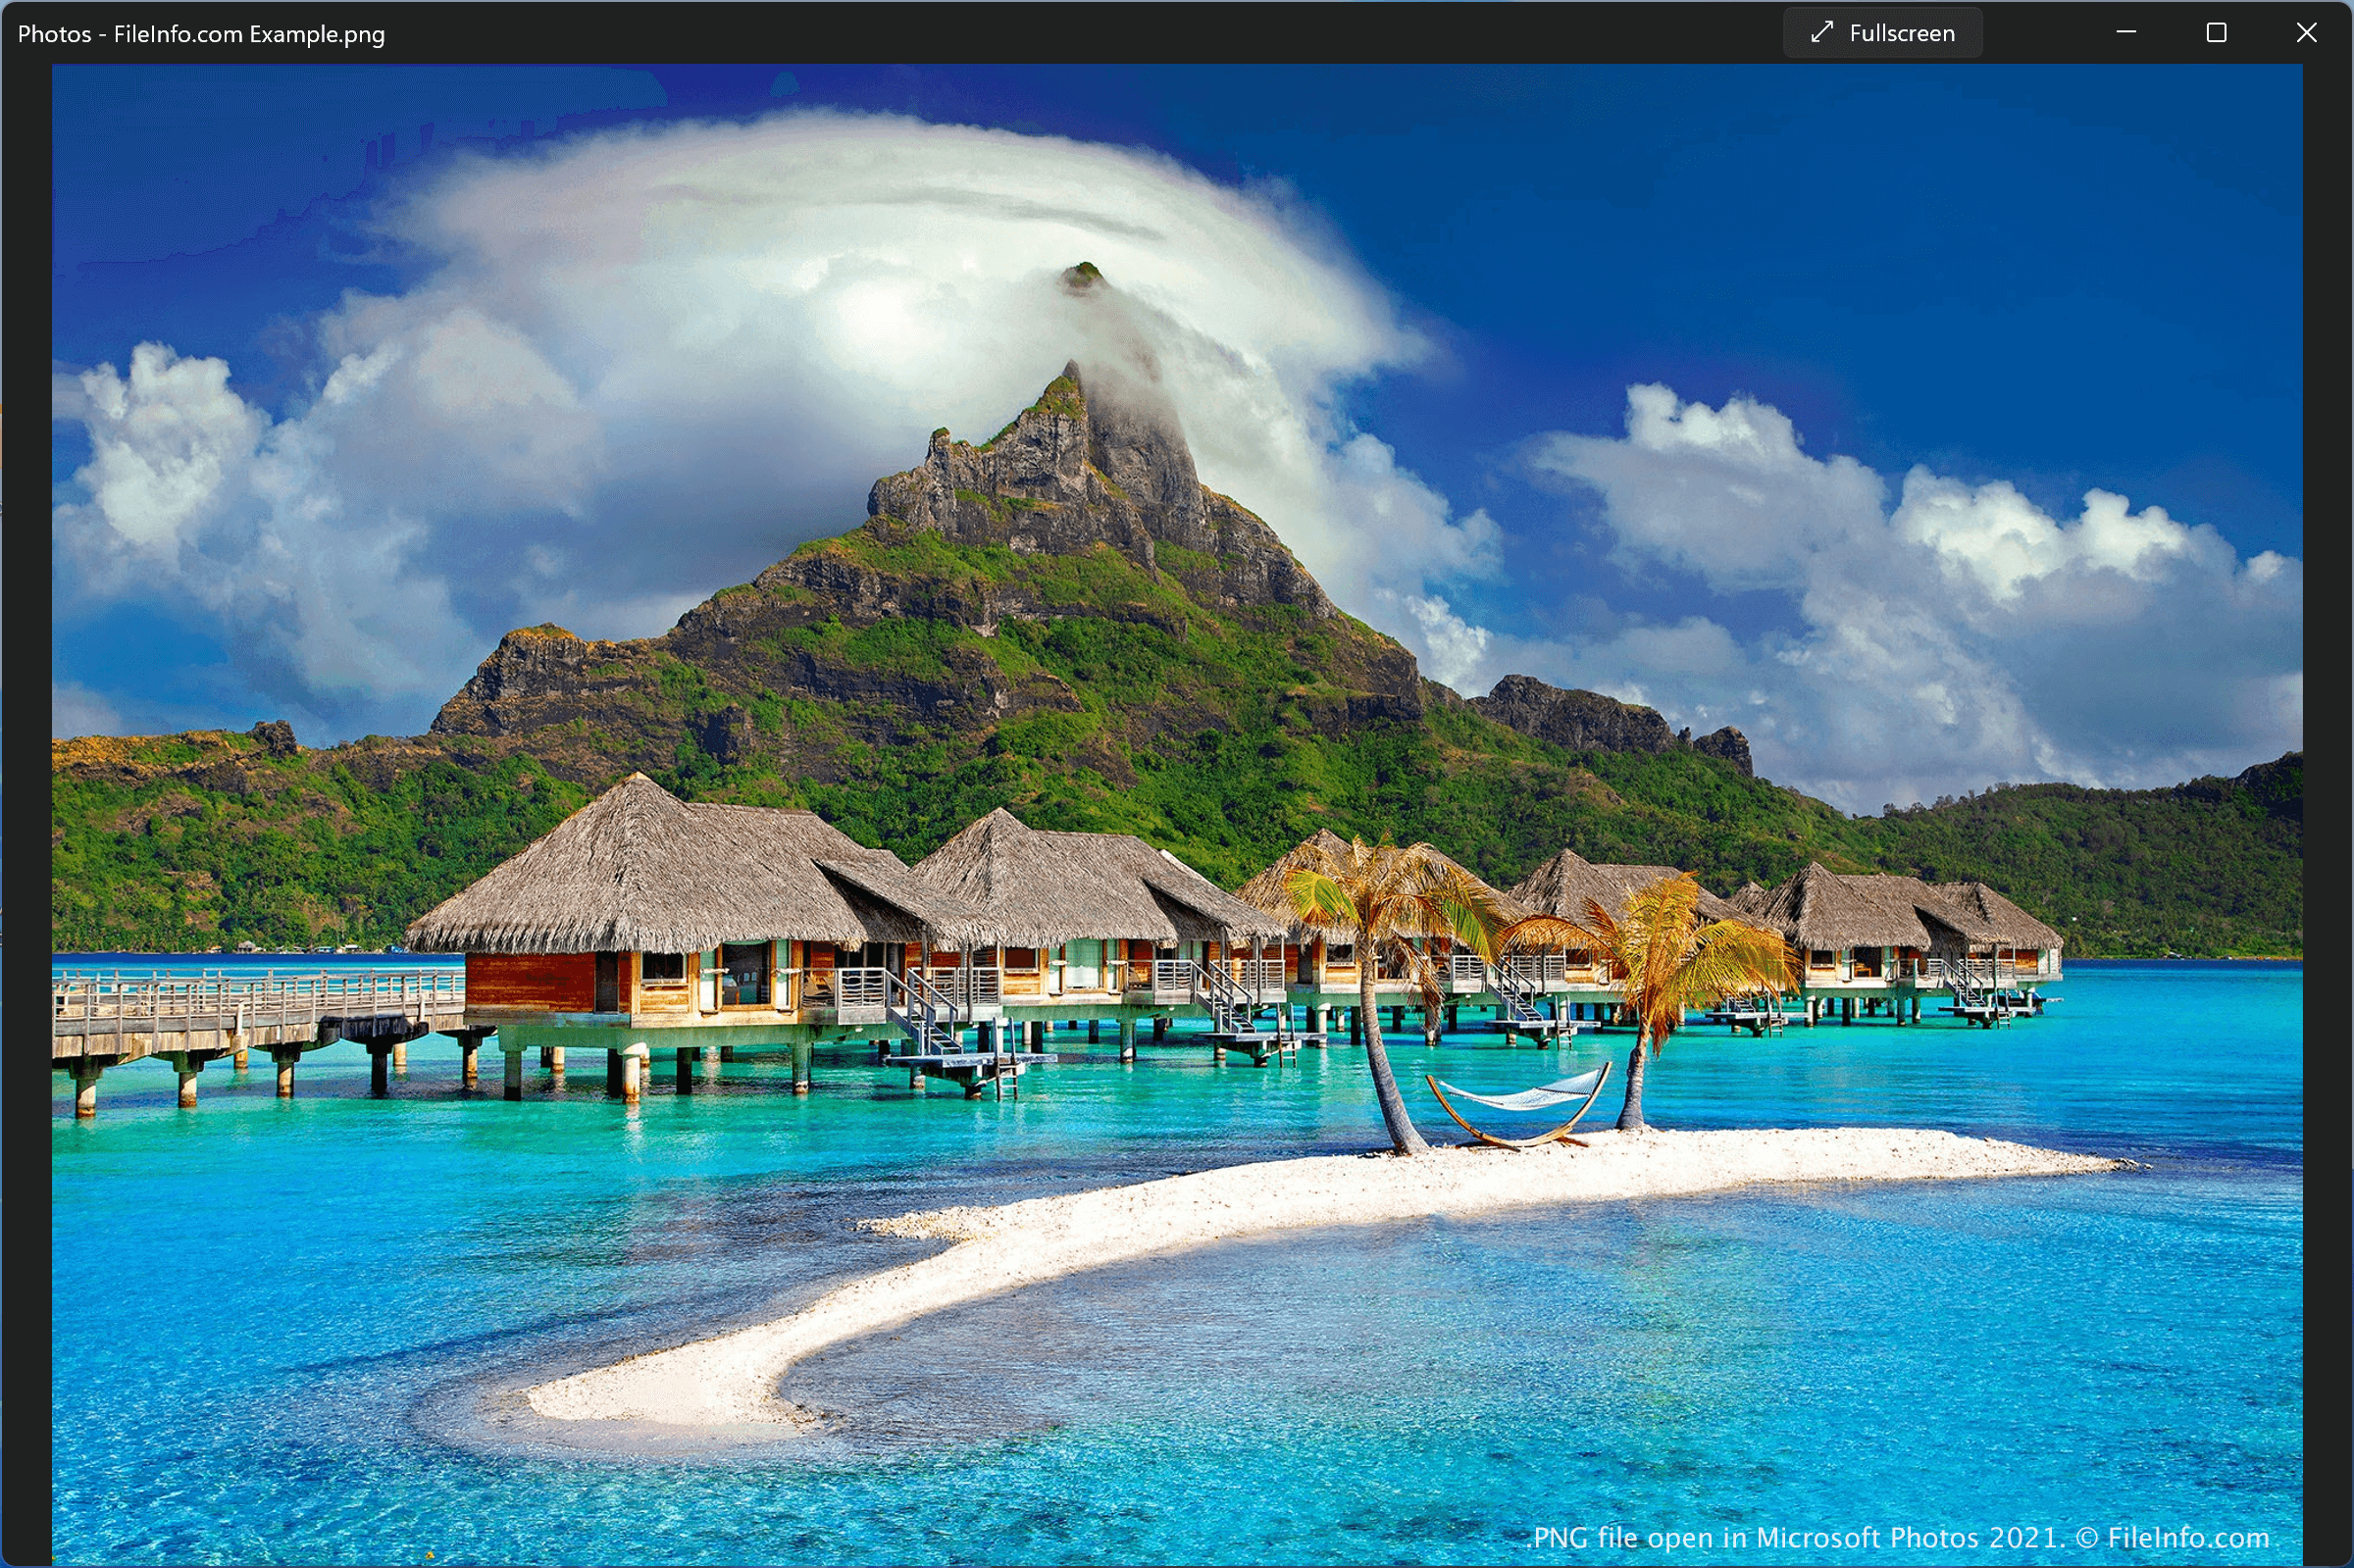

In [ ]:
img = 'https://fileinfo.com/img/ss/xl/png_79.png'
dp.Image(requests.get(img).content)

In [ ]:
source_img = imageio.imread(img)

In [ ]:
import numpy as np
def grayscaleing(rgb):
  return np.dot(rgb[...,:3],[0.299,0.587,0.114])
gryscl_img = grayscaleing(source_img)

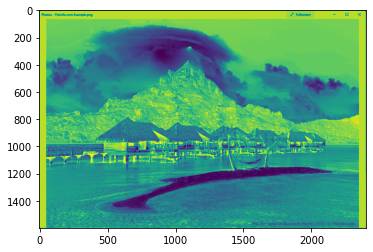

In [ ]:
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

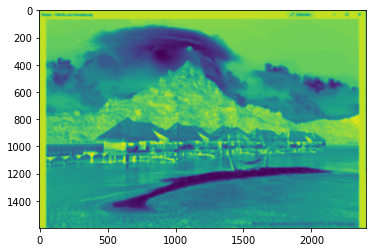

In [ ]:
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [ ]:
def dodging(blur_img,gryscl_img):
  resultant_dodge=blur_img*255/(255-gryscl_img)
  resultant_dodge[resultant_dodge>255]=255
  resultant_dodge[gryscl_img==255]=255
  return resultant_dodge.astype('uint8')

In [ ]:
target_img= dodging(blurred_img, gryscl_img)

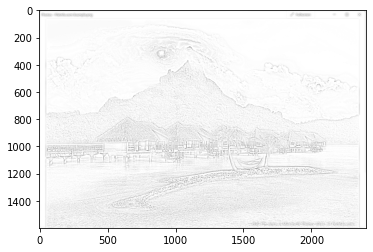

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap='gray')